# EDL 2020 Intro to the Internet of Things

# Introduction to Airtable

This week, you all will explore **Databases and the Internet of Things**


## Part 1: Introduction to Databases

Today we will explore the use of databases as ways of storing data remotely.

For this, we will use Airtable, which is an online service for making databases (tables) and automatically reading/writing to them.

https://airtable.com/

When you create an accont at Airtable, you are granted a certain amount of "space" and the ability to create tables through their webbased visual interface.  You are also given an access token unique to you that you can use to create external access (read and write) from python scripts to your Airtable data.

To get started: go to Airtable and create an account.

https://airtable.com/signup

Then create your first "base" (short for "database") which by default will have a blank table.

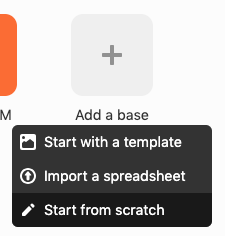

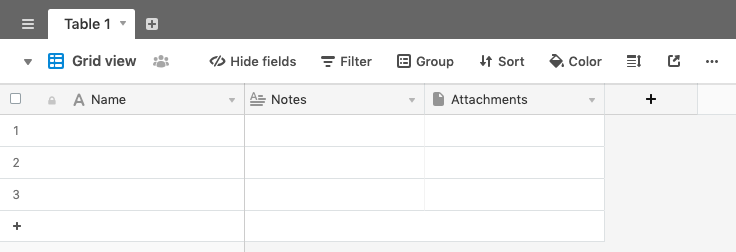

### Exercise W10.BL01

Give your "Base" a good name (we will be making a quiz game later).

Give your first table the name "driving_bot". 

Rename the first column to "move_type", second column to "left_encoder" and the third column to "right_encoder". For the each column, switch their field types to **Number** by right clicking on the column and selecting *Customize field type*. 

Enter some data into the first few fields, for example, I might enter

| move_type | left_encoder | right_encoder |
| --------- | ------------ | ------------- |
| 1         | 300          | -300          |
| 0         | 50           | 50            |
| -1        | -300         | 300           |



## Part 2: Using an API to access data

Here is some information about Airtable's API (Application Protocol Interface) for accessing the data.

https://airtable.com/api

Airtable uses token-based authentication. You need to, from your Airtable account, set up an *API Key* that will be used by your code for gaining access to your data.

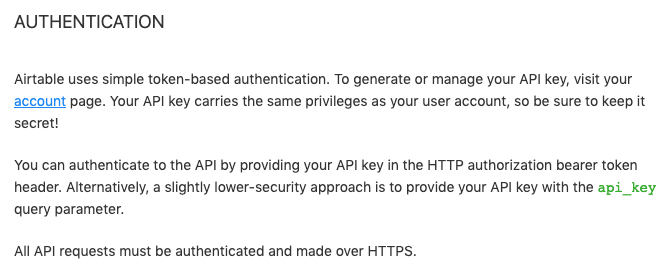

From your account page (https://airtable.com/account) you should generate a key:

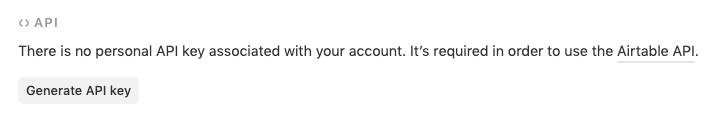

This API Key is your "password" for accessing your data.  The easiest thing to do would be to put it into your code (hard code it into your python code) but that is insecure (as then when you share your code, anyone has access to your key).  Instead, we'll put it into a text file that lives on our Raspberry Pi and is dynamically loaded into our code at runtime.

Create a text file (`api_key.txt`) on your Raspberry Pi and copy/paste that code into that file.

Check using the following code that it properly opens the file, reads in the key, and prints it out.

It should result in something like `keya33HRGfz34kGabz`.  Once you have tested this, you probably want to go to "Cell > Current Outputs > Clear" on the cell in order to remove your key from being stored in your Jupyter Notebook.

In [2]:
# get the Airtable API Key from a local file
def getKey(filename):
    fin = open(filename)
    for line in fin:
        key = line.strip()
    return key

print(getKey('api_key.txt'))

keyDvPR43Sxgb2n4s


### Exercise W10.BL02

Now that you have your key, you can "request" your data from Airtable.

Look in the Airtable API documentation for your particular Base: https://airtable.com/api

Under the **"Authentication"** section (and looking at the `curl` example code) you should be able to find a URL that "points" at your Airtable data.

It should look something like this:
- `https://api.airtable.com/v0/[RANDOM STRING UNIQUE TO YOU]/BASETABLENAME?api_key=YOUR_API_KEY`
                                     ^^^^^^^^^^^^^^^
                                      Random String


In the code below, fill out the RANDOM_STRING variable using the random string you locate on the API documentation page under the **Authentication** section. Refer to the images below if you need help (the highlighted string in the last image is an example of a random string. 

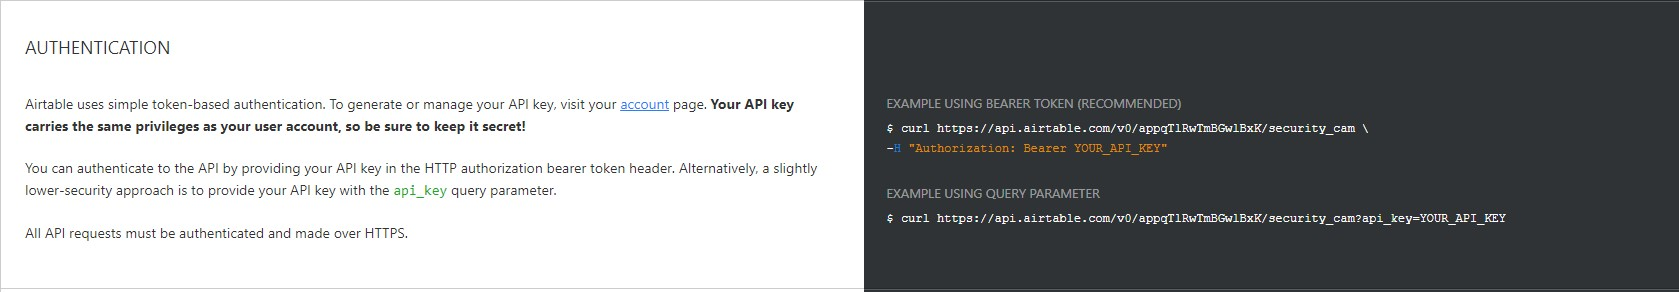

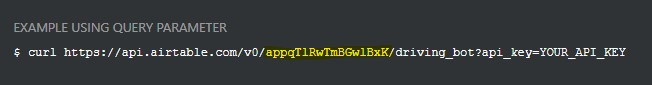

In [3]:
# write your solution to Exercise W10.BL02 here
# copy the return value and paste here:
YOUR_API_KEY=getKey('api_key.txt')
BASETABLENAME = 'driving_bot'
'''---------------------------------------------------------'''
RANDOM_STRING = "appqTlRwTmBGwlBxK"#Put your random string here as shown above
'''---------------------------------------------------------'''

url = 'https://api.airtable.com/v0/'+RANDOM_STRING+'/'+BASETABLENAME+"?api_key="+YOUR_API_KEY

print(url)
print('Type the url above into your browser and ensure it takes you to your airtable data')

https://api.airtable.com/v0/appqTlRwTmBGwlBxK/driving_bot?api_key=keyDvPR43Sxgb2n4s
Type the url above into your browser and ensure it takes you to your airtable data


You might notice when you click your link that the format of this data that you pull from Airtable is similar to the `dict` and `list` data structures that we've seen previously. It is actually called `JSON` (JavaScript Object Notation) and is a standard way of passing data between web applications.  Fortunately, Python has built in functions for accessing and manipulating JSON data.

### Exercise W10.BL03

Run the code below to see how the `requests` module gets the data back from airtable using `url` and then prints the response from the server as `response.text`.

See more info here:

https://www.pythonforbeginners.com/requests/using-requests-in-python

http://docs.python-requests.org/en/master/user/quickstart/

In [ ]:
# write your solution to Exercise W10.BL03 here
import json
import requests

response = requests.get(url)

print(response.text)

## Part 3: Processing the JSON

Now that we are able to access the data from Airtable and read it into a variable, we can use the built in JSON functions to iterate through the data.

The function `json.loads()` loads raw JSON into a variable.  Then you can access the data within it easily.

More on the available JSON functions here:

https://docs.python.org/3/library/json.html

In [ ]:
import json
import requests

# update the URL with your properly formatted URL
response = requests.get(url)

# load the data into a "data" list/dict data structure, from the JSON string
data = json.loads(response.text)['records']

# print all records:
print('Our raw data comes in like this:')
print(data)
print('#########################################')

# go through each records and print the fields:
print('And we can sort it by field by using a loop like this: ')
print('-----------------------------------------')
print("record['fields']")
print('-----------------------------------------')
print('The result is:')
for record in data:
    print(record['fields'])
print('#########################################')

print('If I want to get just the left_encoder value, I can index a field like this:')
print('-----------------------------------------')
print("field['left_encoder']")
print('-----------------------------------------')
print('The result is:')
for record in data:
    field = record['fields']
    print(field['left_encoder'])
print('#########################################')

### Exercise W10.BL04

Iterate through the data in your table and print out the move_type, left_encoder, and right_encoder variables.

In [7]:
# write your solution to Exercise W10.BL04 here
import json
import requests

# update the URL with your properly formatted URL
response = requests.get(url)
data = json.loads(response.text)['records']

for record in data: #loop through all the fields in the data
    field=record['fields'] 
    
    move_type= field['move_type']#get move type from field
    left_encoder= field['left_encoder']#get left encoder from field
    right_encoder= field['right_encoder']#get right encoder from field

    print('m: ',move_type,'l: ',left_encoder,'r: ',right_encoder)

m:  1 l:  0 r:  0
m:  -1 l:  -317 r:  317
m:  0 l:  862 r:  862
m:  0 l:  862 r:  862


## Part 4: Store some data

Now we are going to write BACK to Airtable.

To do this we are going to use the `requests.post()` function. `requests.post()` takes a url to post to and a json formatted payload to send. Our payload will be a field of move_type, left_encoder, and right_encoder values. 

`payload = {'fields': {'move_type':0,'left_encoder':200,'right_encoder':200}}`

There's an example payload to take a look at. 

### Exercise W10.BL06

Do a simple manual test that you can add data to your table.  Write code below that adds new data to your table using the requests.post() function.

In [ ]:
# write your solution to Exercise W10.BL06 here
import json
import requests

# you need to update payload like the example above, to send some values to your table
payload = {'fields': {'move_type':0,'left_encoder':200,'right_encoder':200}}

response = requests.post(url, json=payload)

print(response.text) # not needed: for debugging in case something goes wrong

Now that you know how to download and upload data to your table, you're ready for the main challenge today!

# Today's IOT Challenge

## IOT Mimic-bots

The objective of today's challenge is to create a pair of robots that communicate through a shared airtable. We'll use this airtable to log the position of one robot (called the driving bot) and have the other robot mimic it by reading the data from the table (called the following bot).

Choose someone in your group (breakout room) to be the driving bot, or the leader. This person's robot will drive in a pattern and log its data to airtable. The rest of the people in the group are following bots, or the students who's robots will follow the leader.

Follow the instructions below according to what role you have in your group.

### For the driving bot:

- Share your Airtable `api_key.txt` file with your group and your `RANDOM_STRING` so that they can access your `driving_bot` table. 
- Download and open the `EDL2020_IOT_Drive_to_Airtable.ipynb` notebook linked on Canvas
- Follow the instructions inside to get your code ready for use!

### For the following bot:

- Get your leader's  `api_key.txt` file and their`RANDOM_STRING` so that you can access their`driving_bot` table. You will no longer need your airtable as you will be trying to follow the data in their table
- Download and open the `EDL2020_IOT_Follow_from_Airtable.ipynb` notebook linked on Canvas
- Follow the instructions inside to get your code ready for use!